# Precip

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

df1['date'] = pd.to_datetime(df1['date'])
df1.index = df1['date']

In [3]:
monthly = df1.resample("M", how='mean')

discharge = monthly['discharge'].fillna(method='bfill')

/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [4]:
monthly['precip']

date
1968-02-29    0.921055
1968-03-31    0.509823
1968-04-30    0.557403
1968-05-31    1.326952
1968-06-30    1.995270
1968-07-31    1.793597
1968-08-31    1.375452
1968-09-30    1.426880
1968-10-31    0.827216
1968-11-30    0.458357
1968-12-31    0.931468
1969-01-31    0.468535
1969-02-28    0.647354
1969-03-31    0.721474
1969-04-30    0.392523
1969-05-31    1.054023
1969-06-30    1.278947
1969-07-31    0.946674
1969-08-31    1.282577
1969-09-30    1.910350
1969-10-31    0.502577
1969-11-30    1.487517
1969-12-31    0.283765
1970-01-31    0.793990
1970-02-28    0.948446
1970-03-31    1.078281
1970-04-30    0.277150
1970-05-31    0.861671
1970-06-30    1.357923
1970-07-31    1.597716
                ...   
2010-07-31    1.637813
2010-08-31    2.259435
2010-09-30    1.681273
2010-10-31    0.192184
2010-11-30    0.716653
2010-12-31    0.792177
2011-01-31    2.009806
2011-02-28    0.739550
2011-03-31    0.853516
2011-04-30    0.356093
2011-05-31    0.990645
2011-06-30    2.050800
2011-0

/ai/apps/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


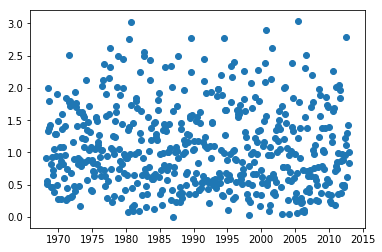

In [5]:
plt.scatter(monthly.index, monthly['precip'].values)

In [14]:
monthly.index[0]

Timestamp('1968-02-29 00:00:00', freq='M')

In [36]:
monthly[11:23]

,precip,evap,discharge,max_temp,min_temp,lat,lon
date,,,,,,,
1969-01-31 00:00:00,0.468535,99,9,-22.0472,-31.5955,54.752,-117.206
1969-02-28 00:00:00,0.647354,NaN,NaN,-4.74823,-17.9065,54.752,-117.206
1969-03-31 00:00:00,0.721474,NaN,0.0171677,1.58944,-10.4592,54.752,-117.206
1969-04-30 00:00:00,0.392523,NaN,1.38867,11.359,-0.726097,54.752,-117.206
1969-05-31 00:00:00,1.05402,NaN,0.670313,14.8778,2.94814,54.752,-117.206
1969-06-30 00:00:00,1.27895,NaN,0.166307,18.2636,7.65875,54.752,-117.206
1969-07-31 00:00:00,0.946674,NaN,0.152216,19.4504,8.55813,54.752,-117.206
1969-08-31 00:00:00,1.28258,NaN,0.0745419,18.3399,7.23966,54.752,-117.206
1969-09-30 00:00:00,1.91035,NaN,0.218193,11.6118,3.37353,54.752,-117.206


## Precipitation pattern along the year

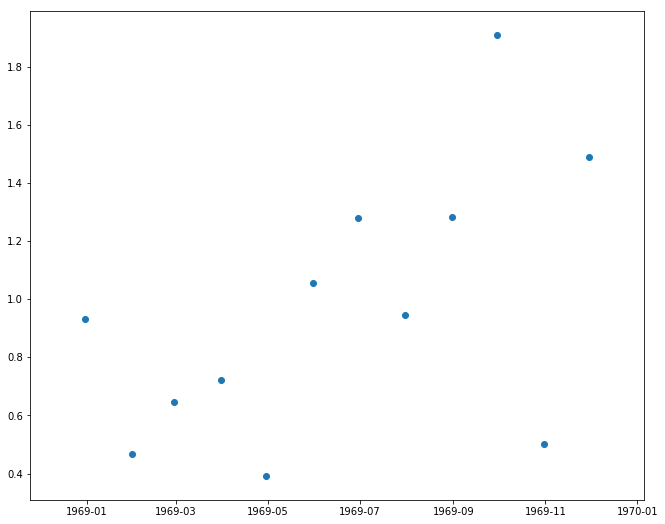

In [66]:
#plt.figure(figsize=(5,5))
plt.scatter(monthly[10:22].index, monthly[10:22]['precip'])

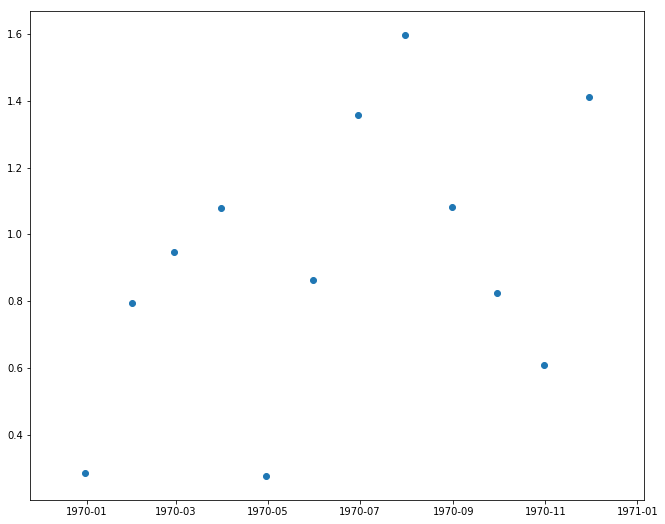

In [65]:
plt.scatter(monthly[22:34].index, monthly[22:34]['precip'])

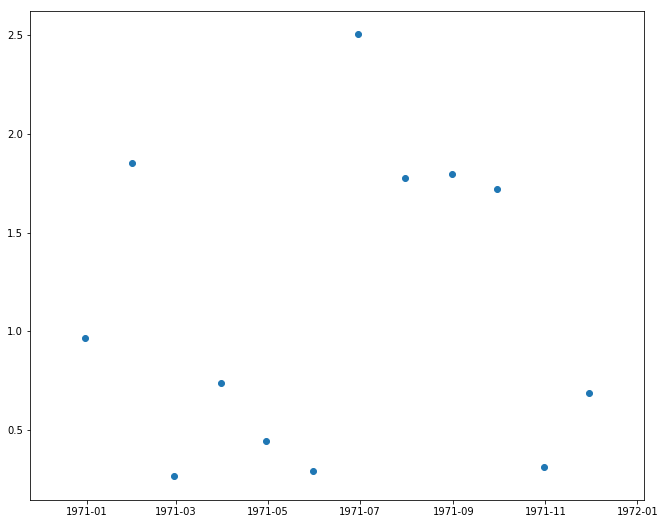

In [63]:
plt.scatter(monthly[34:46].index, monthly[34:46]['precip'])

May is consistently having low precipitation.

The month with the highest precipitation is varying.

## Discharge pattern along the year

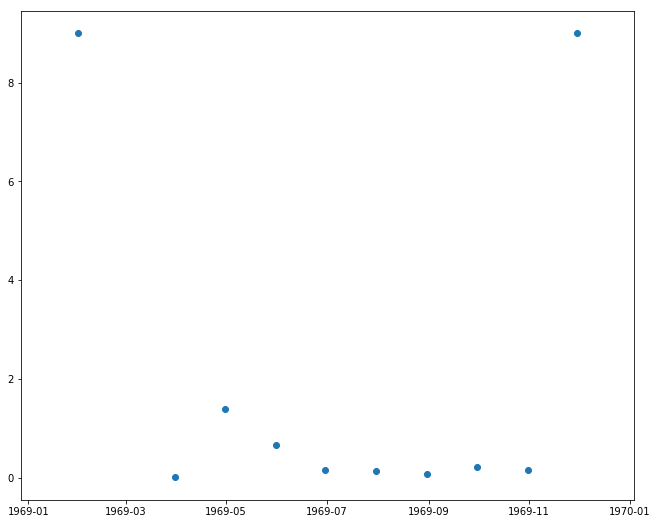

In [62]:
#plt.figure(figsize=(5,5))
plt.scatter(monthly[10:22].index, monthly[10:22]['discharge'])

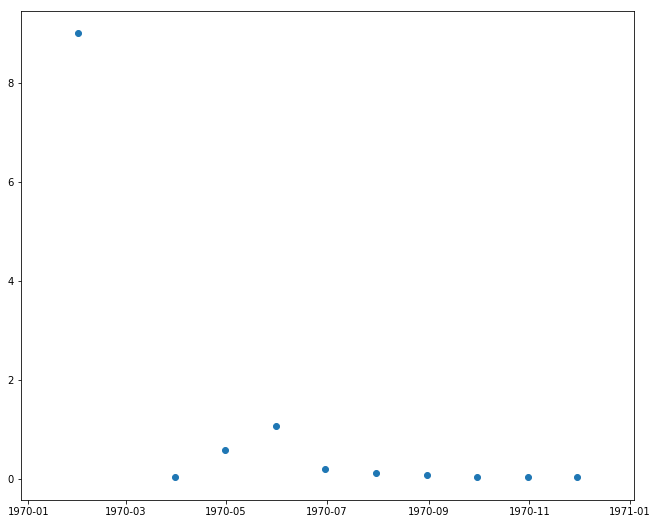

In [61]:
plt.scatter(monthly[22:34].index, monthly[22:34]['discharge'])

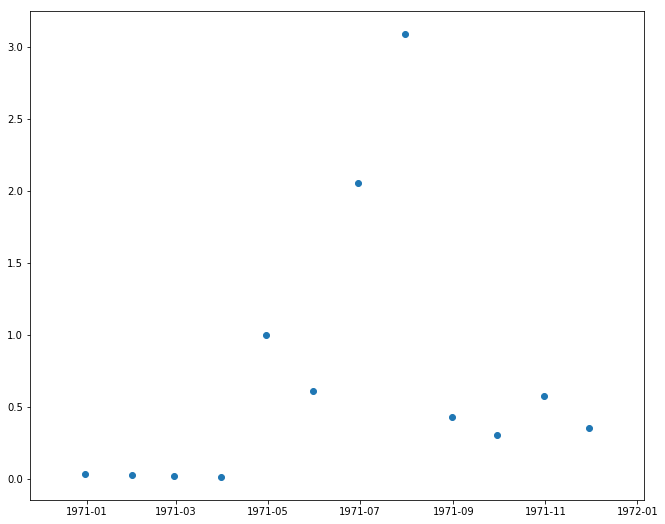

In [58]:
plt.scatter(monthly[34:46].index, monthly[34:46]['discharge'])

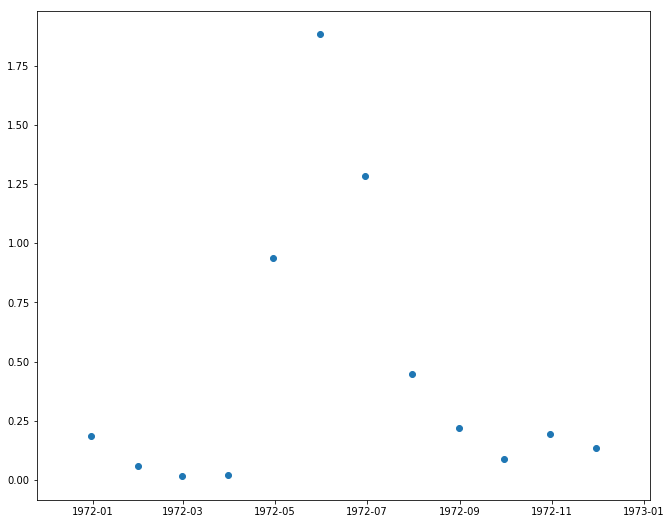

In [56]:
plt.scatter(monthly[46:58].index, monthly[46:58]['discharge'])

The "flood" moved from the beginning of the year to the middle of the year.

In [52]:
#monthly[monthly.index== pd.dt.date(1968,2,29)]

In [ ]:
plt.scatter(monthly.index, monthly['precip'].values)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

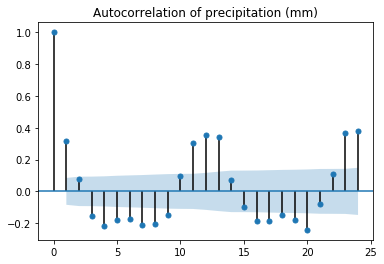

In [7]:
plot_acf(monthly['precip'], lags=24, title="Autocorrelation of precipitation (mm)")
plt.show()

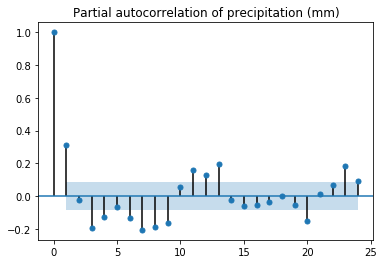

In [8]:
plot_pacf(monthly['precip'], lags=24, title="Partial autocorrelation of precipitation (mm)")
plt.show()

In [10]:
import statsmodels.api as sm
from pylab import rcParams

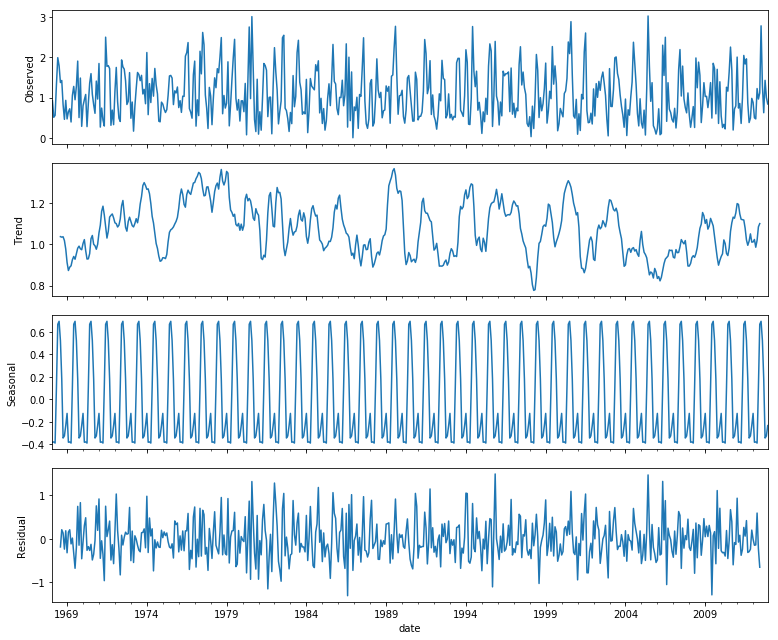

In [11]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(monthly['precip'],freq=12) # monthly frequency
figure = decomposed.plot()
plt.show()

In [15]:
monthly['precip'].index[0]

Timestamp('1968-02-29 00:00:00', freq='M')

In [16]:
monthly['lat'][0]

54.75199999999997

In [17]:
monthly['lon'][0]

-117.2057